**Data cleaning and question 2**

2) If I have a house with an above average grade, what factors will influence its sales price? As a related question, how can I further increase the price of my property?

As outlined in the introduction document, we know that properties with a high grade tend to be more expensive. What would influence the price of a property with an above average grade?

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

The grading system for houses in the King County area runs from 1 to 13. Given that the client has a house with a high grade, we can assume that they have a house with a grade of 8 or above. We must therefore explore the dataset for houses with a grade of 8 or above.

In [3]:
df['grade'].isna().any()

False

In [4]:
df['grade'].mean()

7.657915451220076

The mean grade of the houses in the dataset is 7.65. This means our client has a house which has a grade of 7.65 or above.

In [5]:
df['grade'].dtype

dtype('int64')

The type of data included in the grade column are integers. This means we will need to select for all the houses which have a grade of 8 or above.

In [6]:
df_grade_above8 = df.loc[df['grade'] >= 8]

In [7]:
df_grade_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336


We need to explore each factor in turn to see which might increase the price of a house if it has an above average grade.

In [8]:
df_grade_above8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10315 entries, 4 to 21595
Data columns (total 21 columns):
id               10315 non-null int64
date             10315 non-null object
price            10315 non-null float64
bedrooms         10315 non-null int64
bathrooms        10315 non-null float64
sqft_living      10315 non-null int64
sqft_lot         10315 non-null int64
floors           10315 non-null float64
waterfront       9199 non-null float64
view             10285 non-null float64
condition        10315 non-null int64
grade            10315 non-null int64
sqft_above       10315 non-null int64
sqft_basement    10315 non-null object
yr_built         10315 non-null int64
yr_renovated     8503 non-null float64
zipcode          10315 non-null int64
lat              10315 non-null float64
long             10315 non-null float64
sqft_living15    10315 non-null int64
sqft_lot15       10315 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 1.7+ MB


**Price**

We must first ensure that the price of houses with an above average grade is controlled for outliers, as there are some very expensive houses which may affect our model.

In [9]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [10]:
price_df_grade_above8 = remove_outlier(df_grade_above8, 'price')

In [11]:
price_df_grade_above8

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
22,7137970340,7/3/2014,285000.0,5,2.50,2270,6300,2.0,0.0,0.0,...,8,2270,0.0,1995,0.0,98092,47.3266,-122.169,2240,7005
24,3814700200,11/20/2014,329000.0,3,2.25,2450,6500,2.0,0.0,0.0,...,8,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
27,3303700376,12/1/2014,667000.0,3,1.00,1400,1581,1.5,0.0,0.0,...,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,0.0,0.0,...,8,2570,0.0,2005,0.0,98052,47.7073,-122.110,2630,6026
30,8562750320,11/10/2014,580500.0,3,2.50,2320,3980,2.0,0.0,0.0,...,8,2320,0.0,2003,0.0,98027,47.5391,-122.070,2580,3980


**Bedrooms**

In [12]:
price_df_grade_above8['bedrooms'].value_counts()

4     4131
3     3867
5      888
2      592
6      137
7       20
1       17
8        3
10       1
9        1
Name: bedrooms, dtype: int64

In [13]:
price_df_grade_above8['bedrooms'].isna().any()

False

In [14]:
price_df_grade_above8['bedrooms'].dtype

dtype('int64')

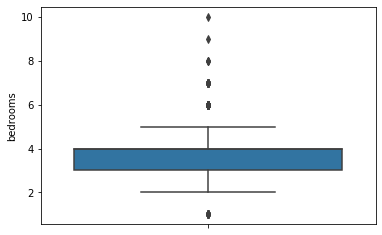

In [15]:
sns.boxplot(y = 'bedrooms', data = price_df_grade_above8, showfliers = True)

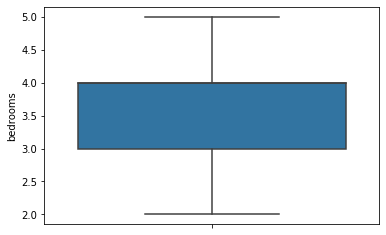

In [16]:
sns.boxplot(y = 'bedrooms', data = price_df_grade_above8, showfliers = False)

Houses with a large amount of bedrooms - which are outliers - may negatively affect our model. We therefore want to remove these from our dataset.

In [17]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [18]:
beds_above8 = remove_outlier(df_grade_above8, 'bedrooms')

In [19]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336


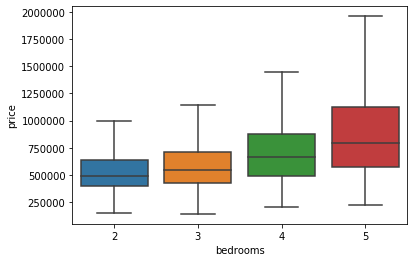

In [20]:
sns.boxplot(x = 'bedrooms', y = 'price', data = beds_above8, showfliers = False)

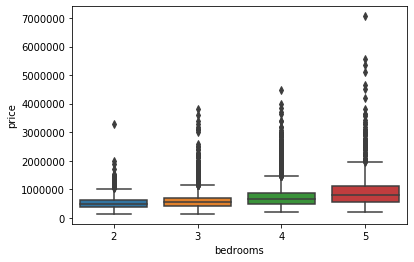

In [21]:
sns.boxplot(x = 'bedrooms', y = 'price', data = beds_above8, showfliers = True)

There seems to be a slight increase in price as the number of bedrooms increases for houses with a grade above 8.

**Bathrooms**

In [22]:
beds_above8['bathrooms'].isna().any()

False

In [23]:
beds_above8['bathrooms'].value_counts

<bound method IndexOpsMixin.value_counts of 4        2.00
5        4.50
10       2.50
15       3.00
21       2.75
22       2.50
24       2.25
26       1.75
27       1.00
29       2.50
30       2.50
33       1.00
35       2.50
37       2.00
39       2.50
40       2.50
41       2.25
42       2.75
45       2.50
47       2.50
49       2.50
51       2.50
54       2.25
55       2.50
57       2.50
58       3.25
59       3.00
60       2.25
62       1.75
63       1.75
         ... 
21560    4.50
21561    3.25
21563    3.25
21564    3.00
21565    3.00
21566    2.25
21570    2.50
21571    2.50
21572    1.50
21573    2.50
21574    3.50
21575    2.75
21576    2.25
21577    3.75
21578    2.75
21579    2.25
21580    2.75
21581    3.25
21582    2.50
21583    3.00
21584    3.75
21585    2.50
21587    2.50
21588    2.00
21589    2.50
21590    3.50
21591    2.50
21592    2.50
21593    2.50
21595    2.50
Name: bathrooms, Length: 10098, dtype: float64>

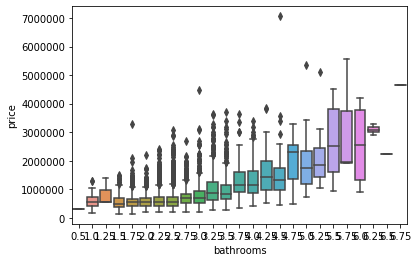

In [24]:
sns.boxplot(x = 'bathrooms', y = 'price', data = beds_above8, showfliers = True)

The price of a house of above average grade does increase as the number of bathrooms it has increases.

**Sqft living**

In [25]:
beds_above8['sqft_living'].isna().sum()

0

In [26]:
beds_above8['sqft_living'].value_counts

<bound method IndexOpsMixin.value_counts of 4        1680
5        5420
10       3560
15       2950
21       3050
22       2270
24       2450
26       2450
27       1400
29       2570
30       2320
33       1090
35       2300
37       2360
39       2620
40       2570
41       4220
42       3595
45       3160
47       2290
49       2753
51       3150
54       2730
55       2830
57       2420
58       3250
59       1850
60       2150
62       2519
63       1540
         ... 
21560    4850
21561    1900
21563    1730
21564    2780
21565    2780
21566    1500
21570    1430
21571    1520
21572    1210
21573    2540
21574    4910
21575    2770
21576    1190
21577    4170
21578    2500
21579    1530
21580    3600
21581    3410
21582    3118
21583    3990
21584    4470
21585    1425
21587    2270
21588    1490
21589    2520
21590    3510
21591    1310
21592    1530
21593    2310
21595    1600
Name: sqft_living, Length: 10098, dtype: int64>

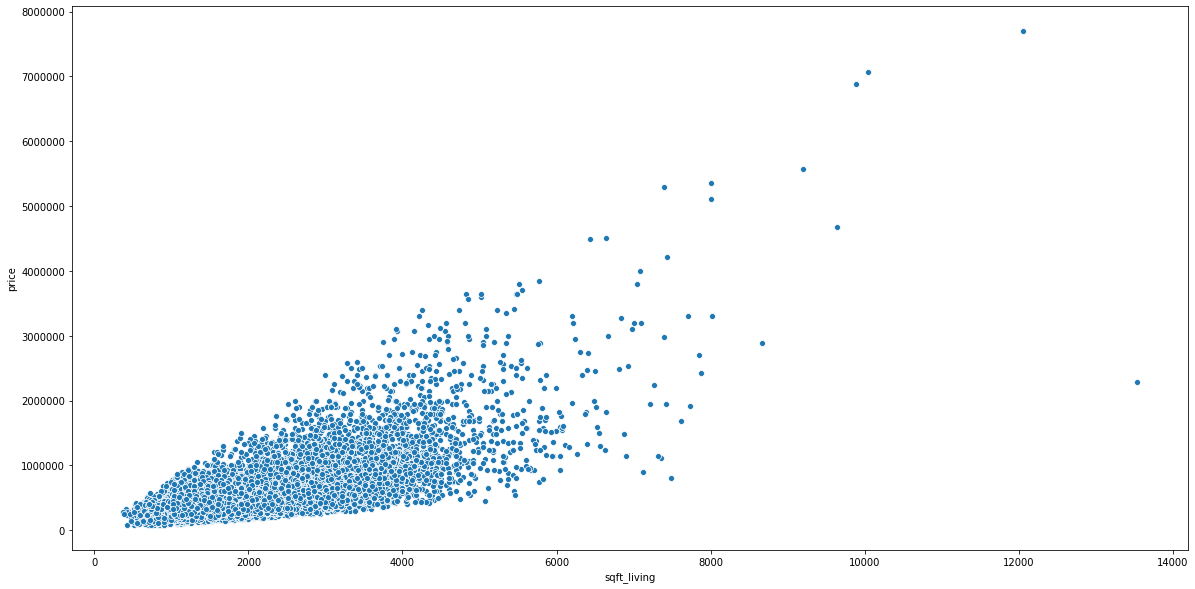

In [27]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df)

There seems to be a clear trend here: the larger the house, the higher its price will be.

**Sqft lot**

In [28]:
beds_above8['sqft_lot'].isna().sum()

0

In [29]:
beds_above8['sqft_lot'].value_counts()

5000      126
4000      100
6000       97
7200       64
3600       48
4500       44
5500       33
8400       32
7000       30
4800       30
7500       30
9000       29
7350       29
9600       28
8000       28
5400       25
7800       25
4400       22
10800      21
7700       20
4200       19
10000      19
5100       19
3000       17
6500       17
9900       16
5750       16
8100       14
4080       14
12000      14
         ... 
10256       1
6166        1
4119        1
2076        1
6174        1
18731       1
6182        1
22518       1
8175        1
38830       1
10184       1
1972        1
40887       1
26413       1
167869      1
6078        1
14274       1
49091       1
6086        1
47050       1
4069        1
4045        1
24527       1
10192       1
16339       1
6110        1
8159        1
10208       1
2020        1
53250       1
Name: sqft_lot, Length: 6533, dtype: int64

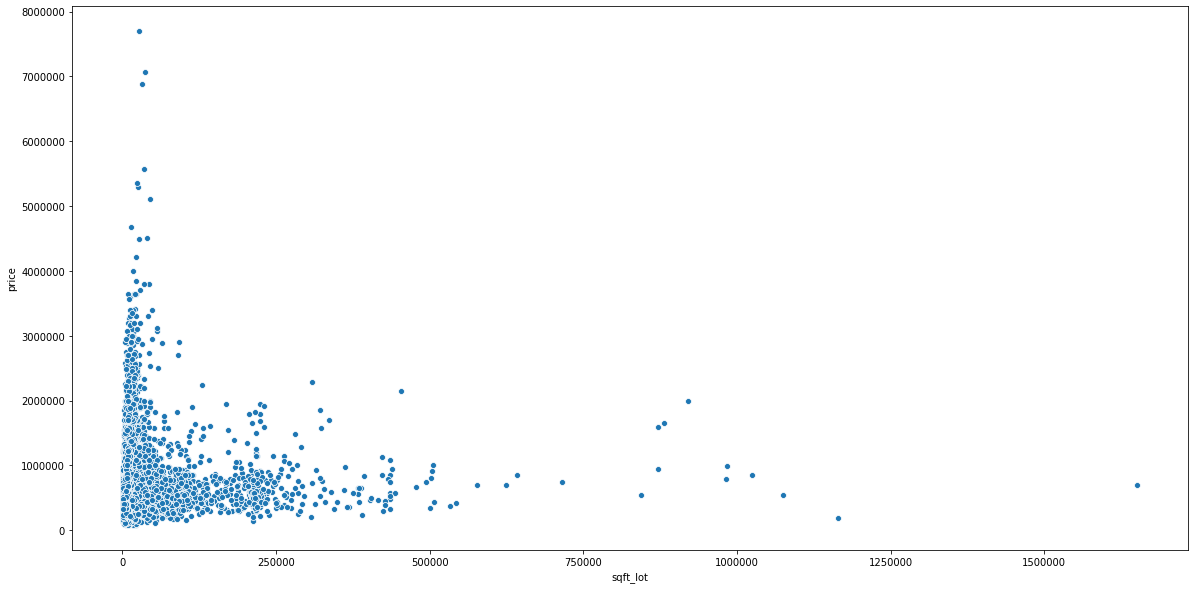

In [30]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_lot", y="price",
                      data=df)

The trend does not seem so clear here. There are many houses with a sqft lot which is the same size as the sqft living, and there is a very low rise in price as the size of the lot increases (where this differs from the size of the living area).

**Floors**

In [31]:
beds_above8['floors'].isna().sum()

0

In [32]:
beds_above8['floors'].value_counts()

2.0    6120
1.0    2805
1.5     534
3.0     504
2.5     129
3.5       6
Name: floors, dtype: int64

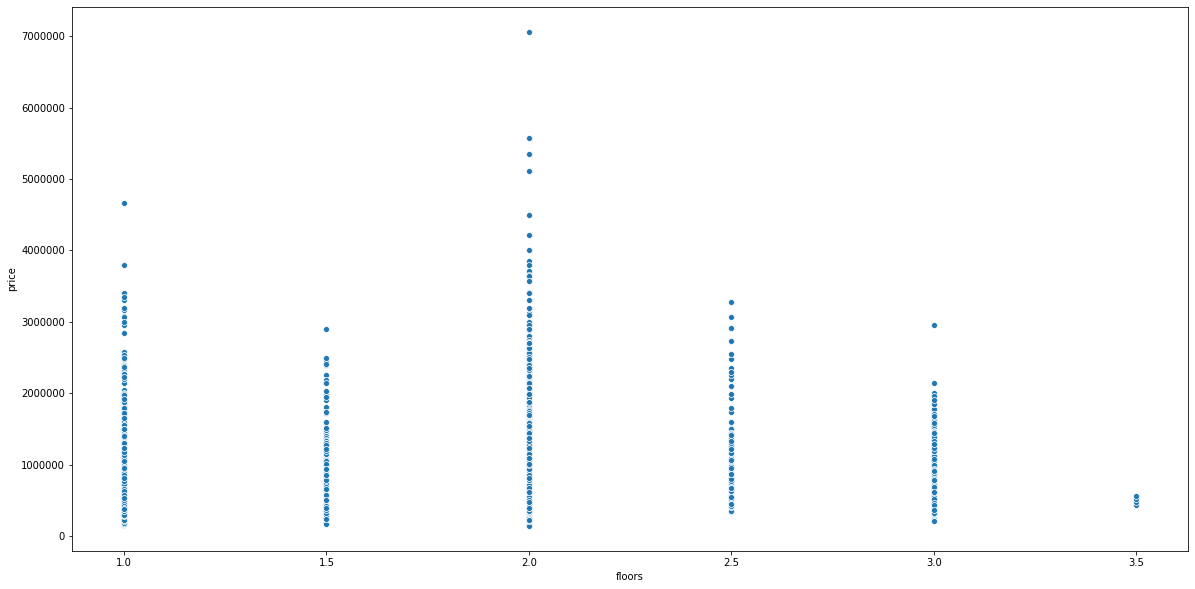

In [33]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="floors", y="price",
                      data=beds_above8)

The trend is not clear here either - in fact, house prices seem to increase with the number of floors until this reaches 2. Beyond this, house prices actually fall. Moreover, houses with a mezzanine (1.5 floors) are cheaper than houses with one floor only.

**Waterfront**

In [34]:
beds_above8["waterfront"].fillna(int(0), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336


In [36]:
beds_above8['waterfront'].value_counts()

0.0    9991
1.0     107
Name: waterfront, dtype: int64

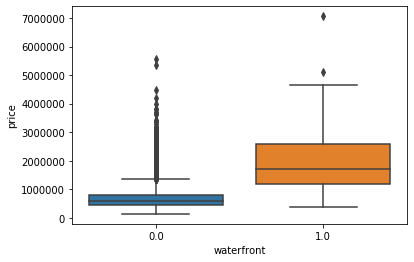

In [37]:
sns.boxplot(x = 'waterfront', y = 'price', data = beds_above8)

We can see that having a view of the waterfront increases a house's sales price.

**Condition**

In [38]:
beds_above8['condition'].isna().sum()

0

In [39]:
beds_above8['condition'].value_counts()

3    7514
4    2000
5     565
2      17
1       2
Name: condition, dtype: int64

At this stage, we do not know how the condition of a house is rated. Is a '1' high, or is a '5'? If we plot price against condition, this might give us a better idea. We would assume that houses with a higher condition have a higher price.

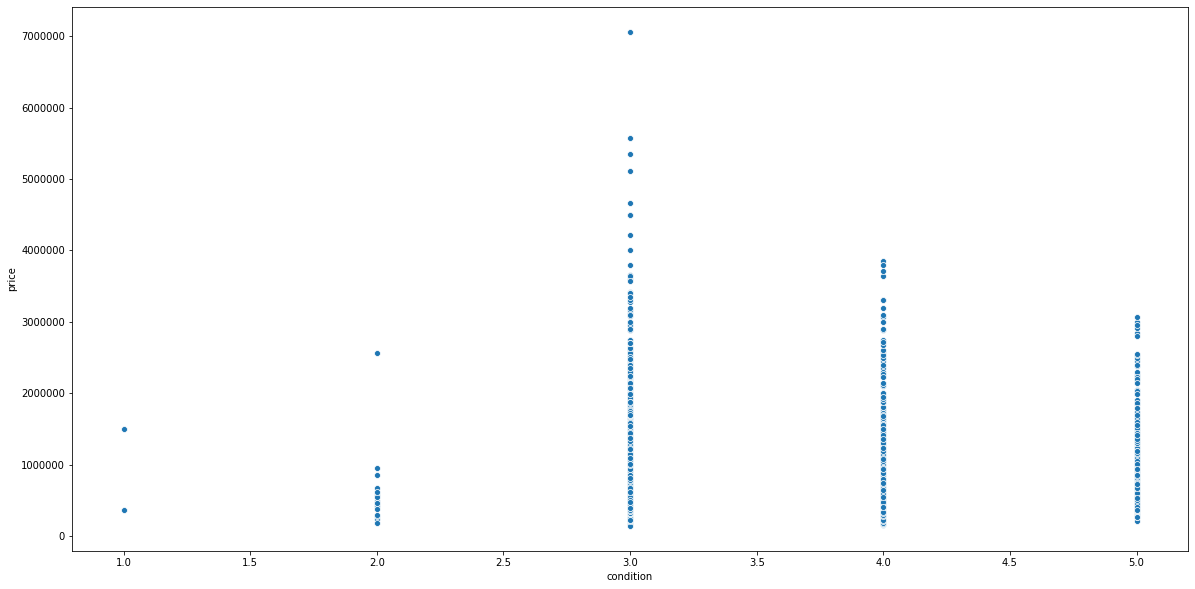

In [40]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="condition", y="price",
                      data=beds_above8)

It does seem that prices with a higher condition rating will have a higher price.

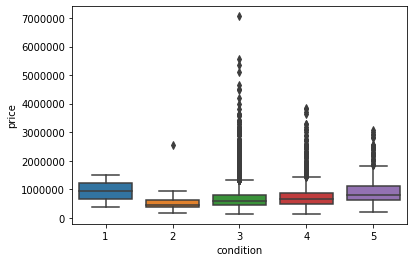

In [41]:
sns.boxplot(x = 'condition', y = 'price', data = beds_above8)

The condition of a house doesn't seem to affect its price; in fact, houses with a low condition rating have a higher average price than houses with a high condition rating.

**Latitude**

In [42]:
beds_above8['lat'].isna().any() 

False

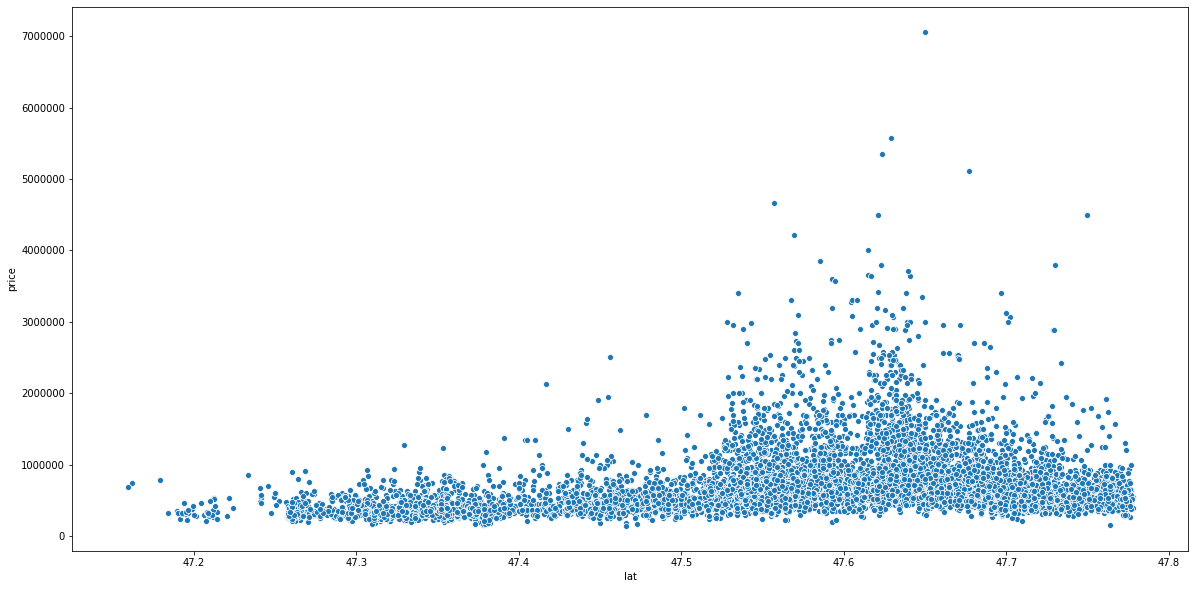

In [43]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=beds_above8)

There seems to be a slightly interesting relationship here: as the latitude of a house increases, its price tends to increase (so the further north a house is, the higher its price).

**Longitude**

In [44]:
beds_above8['long'].isna().any()

False

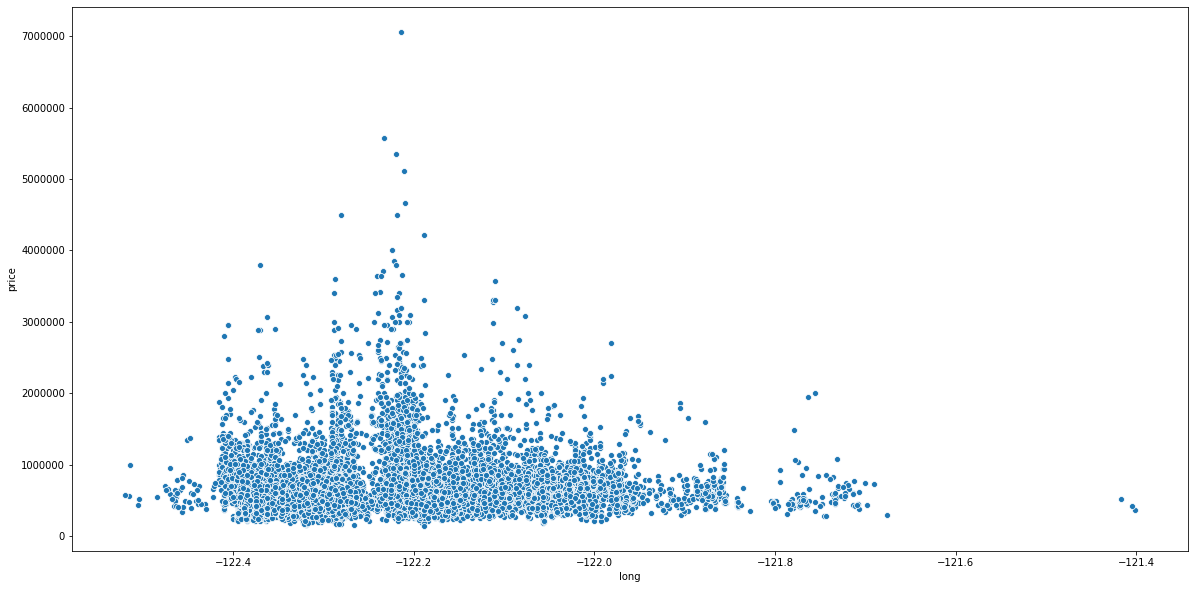

In [45]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="long", y="price",
                      data=beds_above8)

The houses which are in higher longitudes have a higher price.

**Sqft living nearest 15 neighbours**

In [46]:
beds_above8['sqft_living15'].isna().any()

False

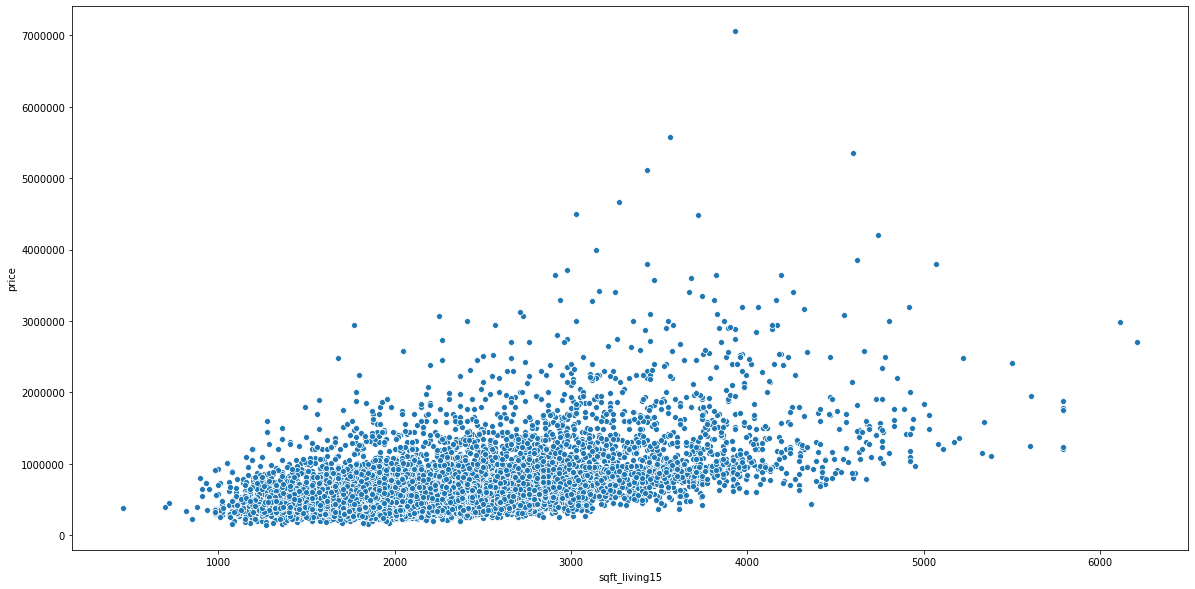

In [47]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living15", y="price",
                      data=beds_above8)

There seems to be a relation here: the larger the mean size of houses surrounding a house, the higher its price will be.

**Year renovated**

We need to remove the null values in the year renovated column and replace them with the mode.

In [48]:
beds_above8['yr_renovated'].isna().sum()

1776

In [49]:
beds_above8['yr_renovated'].mode()

0    0.0
dtype: float64

In [50]:
(beds_above8['yr_renovated'] == 0.0).value_counts()

True     7950
False    2148
Name: yr_renovated, dtype: int64

In [51]:
beds_above8["yr_renovated"].fillna(int(0), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [52]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336


In [53]:
(beds_above8['yr_renovated'] == 0.0).value_counts()

True     9726
False     372
Name: yr_renovated, dtype: int64

**Year built**

We can also calculate the age of a house and see whether this influences its price. We must create a new column for this.

In [54]:
beds_above8['yr_built'].isna().sum()

0

In [55]:
beds_above8['yr_built'].value_counts()

2014    519
2006    369
2005    332
2007    314
2004    314
2008    297
2003    266
2001    236
1990    221
1978    219
1977    212
1989    208
1999    196
1988    192
1987    189
1998    181
1979    181
2013    171
2000    169
1994    160
2009    156
1991    156
2002    152
1993    145
1996    141
1976    140
1992    137
1984    136
1997    132
2012    128
       ... 
1924     21
1918     18
1922     18
1921     18
1908     16
1923     16
1900     16
1914     15
1911     15
1946     13
1919     13
1913     13
1917     12
1942     11
1938     11
1933     11
1932     11
1916     11
1915     11
1902     10
1936     10
1920     10
1901      8
1903      8
1943      8
1904      7
1945      6
1935      6
1934      5
1944      5
Name: yr_built, Length: 116, dtype: int64

In [56]:
beds_above8['date'].dtype

dtype('O')

In [57]:
beds_above8['yr_built'].dtype

dtype('int64')

In [58]:
beds_above8['year_sold'] = beds_above8[['date']].applymap(lambda x: x[-4:])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
beds_above8['year_sold'].head()

4     2015
5     2014
10    2015
15    2015
21    2014
Name: year_sold, dtype: object

In [60]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,2015
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,2015
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,2014


In [61]:
beds_above8.shape

(10098, 22)

In [62]:
beds_above8.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

In [63]:
beds_above8['year_sold'] = beds_above8['year_sold'].astype('int64')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
beds_above8['age_of_house'] = beds_above8['year_sold'] - beds_above8['yr_built']

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_of_house
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,2015,50
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,2015,36
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,2014,46


In [66]:
beds_above8['age_of_house'].isna().any()

False

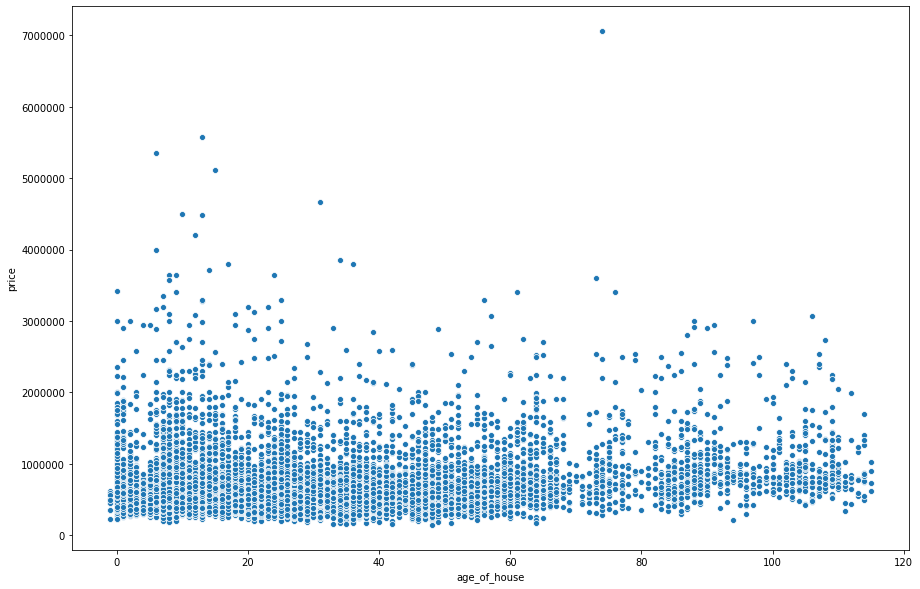

In [75]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_of_house", y="price",
              data=beds_above8)

There is a slight tendency for older houses (above the age of 60) to have a higher price. The price range for newer houses is much wider.

As can be seen from the figure below, the effect of age on houses with a waterfront view doesn't seem to be that great.

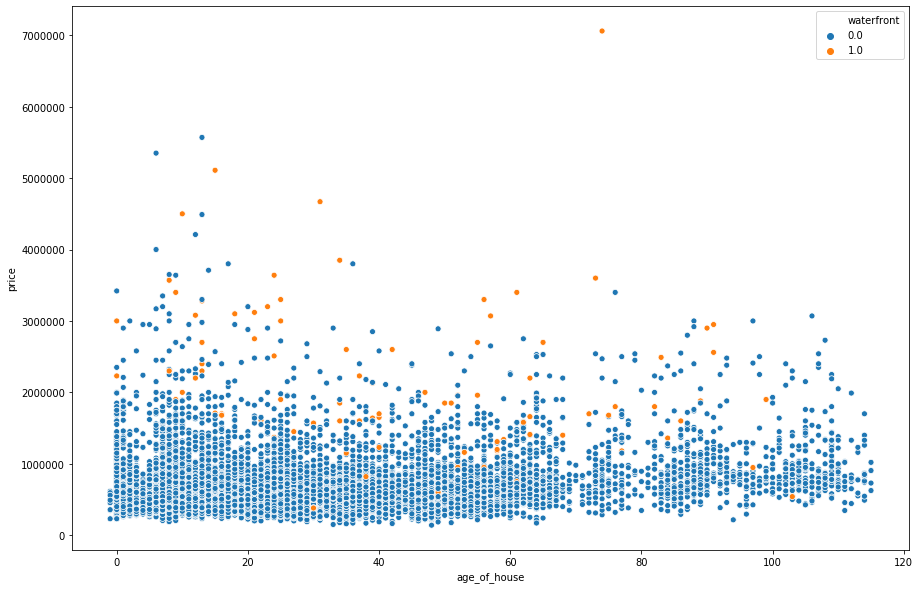

In [76]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_of_house", y="price",hue = 'waterfront',
              data=beds_above8)

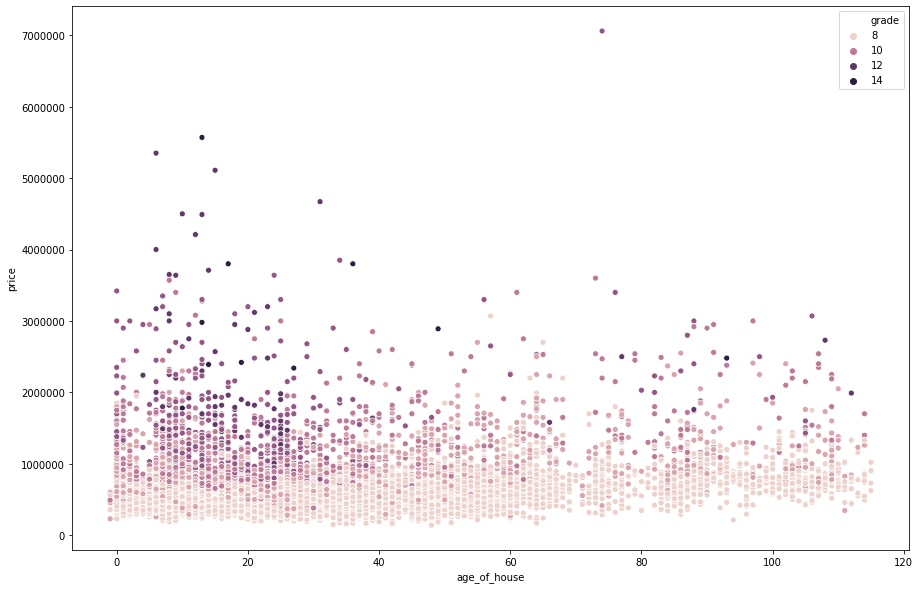

In [77]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_of_house", y="price",hue = 'grade',
              data=beds_above8)

The price of a house seems to decrease with its age and as its grade increases.

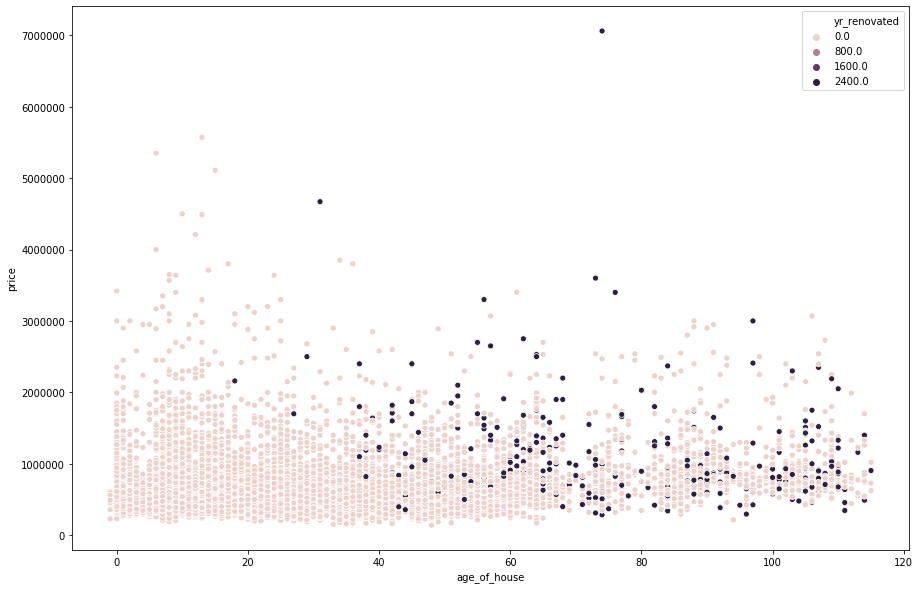

In [79]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x="age_of_house", y="price",hue = 'yr_renovated',
              data=beds_above8)

As the age of a house increases, it is more likely to have been renovated. However, this does not have a positive effect on the price of the house.

**Sqft basement**

We need to delete or replace the values which have a '?' in them for the basement feature. Given that the mode for this feature is 0, we can replace them with a 0.

In [67]:
sqft_indices = beds_above8.loc[beds_above8['sqft_basement'] == '?'].index

In [68]:
sqft_indices

Int64Index([   42,    79,   115,   217,   309,   384,   633,   685,   881,
              890,
            ...
            20931, 20992, 21017, 21087, 21109, 21248, 21356, 21365, 21473,
            21581],
           dtype='int64', length=214)

In [69]:
beds_above8.loc[sqft_indices, ['sqft_basement']] = '0.0'
beds_above8['sqft_basement'].astype('float64')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4           0.0
5        1530.0
10       1700.0
15        970.0
21        720.0
22          0.0
24          0.0
26        700.0
27          0.0
29          0.0
30          0.0
33          0.0
35        790.0
37          0.0
39          0.0
40          0.0
41       1620.0
42          0.0
45          0.0
47          0.0
49        588.0
51       1510.0
54        600.0
55          0.0
57          0.0
58          0.0
59          0.0
60        560.0
62          0.0
63          0.0
          ...  
21560    1310.0
21561     650.0
21563     410.0
21564       0.0
21565       0.0
21566     280.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       0.0
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21595       0.0
Name: sqft_basement, Len

In [70]:
beds_above8['sqft_basement'].isna().sum()

0

In [71]:
beds_above8['sqft_basement'].value_counts()

0.0       6143
1000.0      86
700.0       84
800.0       81
600.0       76
900.0       65
400.0       56
500.0       55
300.0       49
1100.0      44
480.0       44
670.0       42
420.0       42
620.0       42
1200.0      41
750.0       40
720.0       38
840.0       38
940.0       37
960.0       37
880.0       37
450.0       36
530.0       36
290.0       36
680.0       36
380.0       35
640.0       35
630.0       35
200.0       34
1070.0      33
          ... 
2196.0       1
2240.0       1
1548.0       1
906.0        1
1913.0       1
2720.0       1
2090.0       1
295.0        1
2350.0       1
2100.0       1
1248.0       1
20.0         1
1284.0       1
588.0        1
666.0        1
3260.0       1
143.0        1
274.0        1
266.0        1
1816.0       1
207.0        1
2730.0       1
2360.0       1
1852.0       1
2580.0       1
2010.0       1
516.0        1
2180.0       1
556.0        1
3000.0       1
Name: sqft_basement, Length: 275, dtype: int64

In [72]:
beds_above8['sqft_basement'].mode()

0    0.0
dtype: object

In [73]:
beds_above8.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_of_house
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,2015,50
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,2015,36
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,2014,46
